In [107]:
#import files

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from collections import Counter
import random
import itertools
import datetime as dt                        
from scipy import stats  
from IPython.display import display          
import warnings                                
warnings.filterwarnings('ignore') 
import os                  
import gc   
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [108]:
#import files and format date data

loans = pd.read_csv('previousloans.csv', parse_dates=['approveddate','creationdate','closeddate','firstduedate','firstrepaiddate'])
performance = pd.read_csv('performance.csv', parse_dates=['approveddate','creationdate'])
demographics = pd.read_csv('demographics.csv', parse_dates=['birthdate'])


In [109]:
performance.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good


In [110]:
performance.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad
4367,8a858fd458639fcc015868eb14b542ad,301967124,8,2017-07-06 21:01:06,2017-07-06 20:01:01,30000.0,34500.0,30,NaN,Bad


In [111]:
demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1976-08-28,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1978-06-23,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1984-04-04,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1983-05-28,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-03-29,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [112]:
demographics.tail()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4341,8a858f155554552501555588ca2b3b40,1988-05-02,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1985-07-14,Savings,7.013749,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1984-06-25,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1984-12-09,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary
4345,8a85896653e2e18b0153e69c1b90265c,1974-04-20,Savings,6.661014,7.472700,UBA,NaN,Permanent,NaN


In [113]:
loans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


In [114]:
loans.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34,2016-04-16 12:36:28,10000.0,13000.0,30,2016-05-14 00:04:52,NaN,2016-05-16,2016-05-13 18:05:07
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07,2016-11-18 13:25:51,30000.0,34400.0,30,2016-12-13 16:08:57,NaN,2016-12-19,2016-12-13 15:53:48
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56,2016-06-12 14:30:50,10000.0,13000.0,30,2016-07-09 15:39:00,NaN,2016-07-12,2016-07-09 15:23:56
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45,2016-08-27 19:03:34,10000.0,13000.0,30,2016-10-15 10:17:54,NaN,2016-09-26,2016-10-15 10:02:45
18182,8a858faf5679a838015688de3028143d,301715255,2,2016-09-14 23:42:14,2016-09-14 22:42:05,10000.0,13000.0,30,2016-09-29 19:51:04,NaN,2016-10-14,2016-09-29 19:35:55


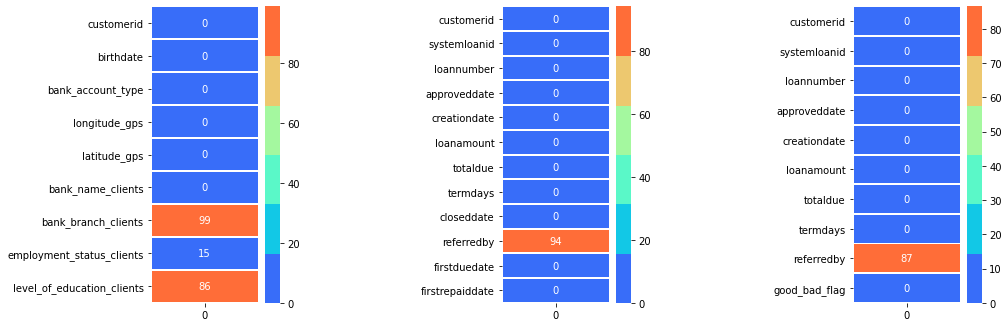

In [115]:
#check for null values

plt.figure(figsize=(15,12))

plt.subplot(231)
sns.heatmap(pd.DataFrame(demographics.isnull().sum()/demographics.shape[0]*100),annot=True,
            cmap=sns.color_palette("rainbow"),linewidth=1,linecolor="white")

plt.subplot(232)
sns.heatmap(pd.DataFrame(loans.isnull().sum()/loans.shape[0]*100),annot=True,
            cmap=sns.color_palette("rainbow"),linewidth=1,linecolor="white")

plt.subplot(233)
sns.heatmap(pd.DataFrame(performance.isnull().sum()/performance.shape[0]*100),annot=True,
            cmap=sns.color_palette("rainbow"),linewidth=1,linecolor="white")

plt.subplots_adjust(wspace = 1.6)

<AxesSubplot:ylabel='good_bad_flag'>

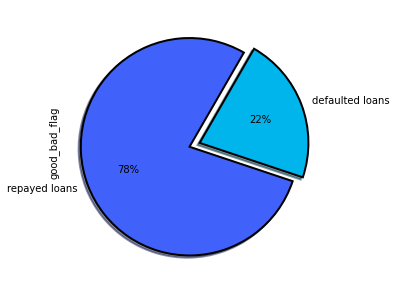

In [116]:
#evaluate loan repayment levels
fig = plt.figure(figsize=(12, 5))
performance["good_bad_flag"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("rainbow",7),
                                                                             startangle = 60,
                                            labels=["repayed loans","defaulted loans"],wedgeprops={"linewidth":2,"edgecolor":"k"},
                                            explode=[.1,0],shadow =True)


22% of the loans were defaulted in the year.

In [117]:
#binarize the good_bad_flag

flag={'Good': 1, 'Bad': 0}
performance.good_bad_flag= performance.good_bad_flag.map(flag)

In [118]:
loans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


In [119]:
#feature engineering

In [120]:
performance.loanamount.unique()

array([30000., 15000., 20000., 10000., 40000., 25000., 50000., 35000.,
       45000., 60000.])

In [121]:
#get the loan approval period in terms of hours
loans['loanapproval']= loans['approveddate']- loans['creationdate']
loans['loanapproval']= loans['loanapproval']/np.timedelta64(1, 'h')

In [122]:
#get the average loan amounts per customer
avloanamount = loans.groupby('customerid')['loanamount'].mean().to_frame().reset_index()
avloanamount.rename(columns={'loanamount': 'avloanamount'}, inplace=True)
loans = pd.merge(loans, avloanamount, how='left', on='customerid')

In [123]:
#get the total number of loans issued per cutsomer
num_loans = loans.groupby('customerid')['systemloanid'].count().to_frame().reset_index()
num_loans.rename(columns = {'systemloanid': 'num_loans'}, inplace=True)
loans = pd.merge(loans, num_loans, how='left', on='customerid')

In [124]:
#get how long they took to pay the loans
loans['firstrepaiddate'] = loans['firstrepaiddate'].astype('datetime64[ns]')
loans['diff'] = (loans['firstrepaiddate'] - loans['firstduedate']).dt.days

In [125]:
#get average default periods
avdiff = loans.groupby('customerid')['diff'].mean().to_frame().reset_index()
avdiff.rename(columns={'diff':'avdiff'}, inplace=True)
loans = pd.merge(loans, avdiff, how='left', on='customerid')

In [126]:
#get average term days
avtermdays = loans.groupby('customerid')['termdays'].mean().to_frame().reset_index()
avtermdays.rename(columns={'termdays':'avtermdays'}, inplace=True)
loans = pd.merge(loans, avtermdays, how='left', on='customerid')

In [127]:
#get average due amounts per customer
avtotaldue = loans.groupby('customerid')['totaldue'].mean().to_frame().reset_index()
avtotaldue.rename(columns={'totaldue':'avtotaldue'}, inplace=True)
loans = pd.merge(loans, avtotaldue, how='left', on='customerid')

In [128]:
loans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,loanapproval,avloanamount,num_loans,diff,avdiff,avtermdays,avtotaldue
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43,1.002222,18181.818182,11,-13,-0.909091,30.0,22081.818182
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00,1.003889,18181.818182,11,-4,-0.909091,30.0,22081.818182
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47,1.001667,18181.818182,11,22,-0.909091,30.0,22081.818182
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43,1.003611,10000.000000,6,0,0.833333,17.5,11750.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35,1.001944,10000.000000,2,11,7.500000,22.5,12250.000000


In [129]:
loans.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate', 'loanapproval',
       'avloanamount', 'num_loans', 'diff', 'avdiff', 'avtermdays',
       'avtotaldue'],
      dtype='object')

In [130]:
clean_loans= loans [['customerid', 'loanapproval', 'avloanamount',
                    'num_loans', 'avdiff', 'avtermdays',
                    'avtotaldue']]

In [131]:
clean_loans.head()

,customerid,loanapproval,avloanamount,num_loans,avdiff,avtermdays,avtotaldue
0,8a2a81a74ce8c05d014cfb32a0da1049,1.002222,18181.818182,11,-0.909091,30.0,22081.818182
1,8a2a81a74ce8c05d014cfb32a0da1049,1.003889,18181.818182,11,-0.909091,30.0,22081.818182
2,8a2a81a74ce8c05d014cfb32a0da1049,1.001667,18181.818182,11,-0.909091,30.0,22081.818182
3,8a8588f35438fe12015444567666018e,1.003611,10000.000000,6,0.833333,17.5,11750.000000
4,8a85890754145ace015429211b513e16,1.001944,10000.000000,2,7.500000,22.5,12250.000000


In [132]:
clean_loans.tail()

,customerid,loanapproval,avloanamount,num_loans,avdiff,avtermdays,avtotaldue
18178,8a858899538ddb8e0153a2b555421fc5,1.001667,21615.384615,13,-5.076923,38.076923,25909.615385
18179,8a858899538ddb8e0153a2b555421fc5,1.004444,21615.384615,13,-5.076923,38.076923,25909.615385
18180,8a858899538ddb8e0153a2b555421fc5,1.001667,21615.384615,13,-5.076923,38.076923,25909.615385
18181,8a858f0656b7820c0156c92ca3ba436f,1.003056,10000.000000,1,19.000000,30.000000,13000.000000
18182,8a858faf5679a838015688de3028143d,1.002500,10000.000000,2,-8.500000,30.000000,13000.000000


In [133]:
clean_loans.shape

(18183, 7)

In [134]:
clean_loans = clean_loans[~clean_loans.customerid.duplicated()]

In [135]:
clean_loans.shape

(4359, 7)

In [136]:
demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1976-08-28,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1978-06-23,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1984-04-04,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1983-05-28,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-03-29,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [137]:
#demographics = demographics[~demographics.customerid.duplicated()]
demographics['age']= round((dt.date.today() - demographics.birthdate.dt.date).dt.days/365)
demographics.drop('birthdate', axis='columns', inplace=True)


In [138]:
demographics['age'].unique()

array([44., 43., 37., 38., 39., 32., 35., 30., 33., 45., 46., 55., 29.,
       51., 49., 36., 53., 41., 47., 52., 26., 58., 34., 31., 42., 40.,
       25., 48., 27., 28., 50., 54., 56., 57.])

In [139]:
demographics.head()


,customerid,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,44.0
1,8a858e275c7ea5ec015c82482d7c3996,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,43.0
2,8a858e5b5bd99460015bdc95cd485634,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,37.0
3,8a858efd5ca70688015cabd1f1e94b55,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,38.0
4,8a858e785acd3412015acd48f4920d04,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,39.0


In [140]:
#merge demographics data set with loans data set
demographics_loans = pd.merge(performance, demographics, on='customerid', how='inner')


In [141]:
demographics_loans.shape


(3277, 18)

In [142]:
demographics_loans.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,1,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,36.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,1,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,29.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,1,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN,49.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,1,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN,35.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,1,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary,44.0


In [143]:
performance.shape


(4368, 10)

In [144]:
#merge all data sets
complete_df = pd.merge( demographics_loans, clean_loans,on='customerid', how='right')
complete_df.shape


(4367, 24)

In [145]:
complete_df.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,bank_branch_clients,employment_status_clients,level_of_education_clients,age,loanapproval,avloanamount,num_loans,avdiff,avtermdays,avtotaldue
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762.0,12.0,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30.0,NaN,1.0,...,NaN,Permanent,Post-Graduate,36.0,1.002222,18181.818182,11,-0.909091,30.0,22081.818182
1,8a8588f35438fe12015444567666018e,301966580.0,7.0,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15.0,NaN,1.0,...,NaN,Permanent,NaN,49.0,1.003611,10000.000000,6,0.833333,17.5,11750.000000
2,8a85890754145ace015429211b513e16,301999343.0,3.0,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15.0,NaN,1.0,...,NaN,Permanent,NaN,35.0,1.001944,10000.000000,2,7.500000,22.5,12250.000000
3,8a858970548359cc0154883481981866,301962360.0,9.0,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30.0,NaN,1.0,...,NaN,Permanent,Primary,44.0,1.001944,18750.000000,8,-3.125000,37.5,23550.000000
4,8a8589f35451855401546b0738c42524,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.018333,14285.714286,7,-5.428571,30.0,17828.571429


In [148]:
#analyze the null values
complete_df.isnull().sum().sort_values(ascending=False)


bank_branch_clients           4337
level_of_education_clients    3927
referredby                    3917
employment_status_clients     1588
good_bad_flag                 1095
bank_account_type             1095
loanamount                    1095
latitude_gps                  1095
bank_name_clients             1095
longitude_gps                 1095
totaldue                      1095
age                           1095
creationdate                  1095
approveddate                  1095
loannumber                    1095
systemloanid                  1095
termdays                      1095
avtotaldue                       0
avtermdays                       0
loanapproval                     0
avloanamount                     0
num_loans                        0
avdiff                           0
customerid                       0
dtype: int64

In [149]:
#impute the columns with less null values with 0
complete_df[['avdiff','avtermdays', 'avtotaldue','num_loans','avloanamount','loanapproval','age']] = complete_df[['avdiff','avtermdays', 'avtotaldue','num_loans','avloanamount','loanapproval','age']].fillna(value=0)

In [150]:
#drop the extremely empty columns
complete_df.drop(['bank_branch_clients', 'level_of_education_clients', 'referredby'],
                axis='columns', inplace= True)


In [151]:
#replace the null values
complete_df['employment_status_clients'].fillna('unknown', inplace=True)


In [152]:
#drop the rows without good_bad_flag values fro better analysis
complete_df = complete_df[complete_df['good_bad_flag'].notna()]


In [153]:
complete_df.isnull().sum()


customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
age                          0
loanapproval                 0
avloanamount                 0
num_loans                    0
avdiff                       0
avtermdays                   0
avtotaldue                   0
dtype: int64

In [154]:
complete_df.shape

(3272, 21)

In [155]:
#univariate/bivariate analysis

In [156]:
complete_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,...,latitude_gps,bank_name_clients,employment_status_clients,age,loanapproval,avloanamount,num_loans,avdiff,avtermdays,avtotaldue
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762.0,12.0,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30.0,1.0,Other,...,6.433055,Diamond Bank,Permanent,36.0,1.002222,18181.818182,11,-0.909091,30.0,22081.818182
1,8a8588f35438fe12015444567666018e,301966580.0,7.0,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15.0,1.0,Other,...,10.292041,EcoBank,Permanent,49.0,1.003611,10000.000000,6,0.833333,17.5,11750.000000
2,8a85890754145ace015429211b513e16,301999343.0,3.0,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15.0,1.0,Savings,...,7.491708,First Bank,Permanent,35.0,1.001944,10000.000000,2,7.500000,22.5,12250.000000
3,8a858970548359cc0154883481981866,301962360.0,9.0,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30.0,1.0,Other,...,9.076574,GT Bank,Permanent,44.0,1.001944,18750.000000,8,-3.125000,37.5,23550.000000
5,8a858e095c59b91b015c5e5cea3719bc,301972027.0,3.0,2017-07-10 19:25:33,2017-07-10 18:25:28,10000.0,13000.0,30.0,1.0,Savings,...,6.557011,GT Bank,Permanent,43.0,1.001944,10000.000000,2,-2.500000,22.5,12250.000000


In [157]:
complete_df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,age,loanapproval,avloanamount,num_loans,avdiff,avtermdays,avtotaldue
count,3.272000e+03,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000
mean,3.019807e+08,5.189792,17834.657702,21284.436278,29.252751,0.782396,4.535675,7.293214,36.708130,1.064253,12942.383678,4.184902,-2.350584,25.353757,15677.450678
std,1.343321e+04,3.667015,10745.429091,11931.218766,11.398643,0.412680,7.922577,3.271196,6.306118,1.018937,4849.804022,3.666765,7.404042,6.870182,5418.459719
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,0.000000,-118.247009,-33.868818,25.000000,1.001111,5000.000000,1.000000,-30.000000,15.000000,5750.000000
25%,3.019689e+08,2.000000,10000.000000,13000.000000,30.000000,1.000000,3.354974,6.473632,32.000000,1.001944,10000.000000,1.000000,-5.333333,20.000000,12250.000000
50%,3.019794e+08,4.000000,10000.000000,13000.000000,30.000000,1.000000,3.587569,6.625817,36.000000,1.003056,10000.000000,3.000000,-2.333333,27.857143,13000.000000
75%,3.019933e+08,7.000000,20000.000000,24500.000000,30.000000,1.000000,6.514509,7.430067,40.000000,1.018611,14444.444444,6.000000,0.000000,30.000000,17501.562500
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,1.000000,151.209290,71.228069,58.000000,38.591944,36666.666667,26.000000,121.000000,60.000000,41252.380952


The 

In [158]:
#sort out the months

df= loans
df.creationdate.sort_values(ascending=True)
df.set_index(pd.DatetimeIndex(df['creationdate']), drop=True, inplace = True)
df=df.groupby([df.index.month]).sum()
df.head()

,systemloanid,loannumber,loanamount,totaldue,termdays,loanapproval,avloanamount,num_loans,diff,avdiff,avtermdays,avtotaldue
creationdate,,,,,,,,,,,,
1,318997757745,5036,19480000.0,23008675.0,30150,1087.578889,2.002569e+07,10115,-2125,-2707.947493,29497.155128,2.352429e+07
2,363991963539,5701,21490000.0,25363025.0,33195,1210.760000,2.154212e+07,10483,-3301,-2878.120969,32646.270922,2.540488e+07
3,546603920541,8791,32508000.0,38401875.0,51015,1828.168056,3.147707e+07,15174,-3992,-4059.734676,48743.240585,3.719894e+07
4,703302560221,10022,38515000.0,45506175.0,61725,2363.884167,3.683236e+07,16590,-6141,-5453.335745,59753.394676,4.370702e+07
5,1004065521778,14348,54548000.0,64920149.7,89745,3380.885278,4.863303e+07,19961,-7001,-7012.195293,85172.588033,5.819457e+07


In [159]:
df.tail()

,systemloanid,loannumber,loanamount,totaldue,termdays,loanapproval,avloanamount,num_loans,diff,avdiff,avtermdays,avtotaldue
creationdate,,,,,,,,,,,,
8,188854172201,1503,7918000.0,9599950.0,15330,629.214722,1.294438e+07,6364,-1048,-1095.422776,18776.601653,1.520301e+07
9,155685412989,1761,8175000.0,9695250.0,12780,531.495000,1.112608e+07,5424,-632,-1073.827704,15659.994910,1.302816e+07
10,191004701495,2416,11185000.0,13168937.5,15900,806.584722,1.358474e+07,6724,-1408,-1360.838227,19242.405844,1.591071e+07
11,270377221503,3493,15800000.0,18681062.5,23955,903.029167,1.790443e+07,8946,-2472,-1906.295830,26195.989702,2.103328e+07
12,284574196725,4044,16985000.0,20150000.0,27000,1375.005000,1.843625e+07,9167,-1916,-2004.602851,27283.400872,2.168736e+07


TypeError: 'str' object is not callable

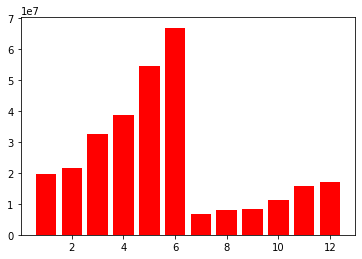

In [160]:
#visualization

plt.bar(df.index, df.loanamount, color='red')
plt.title("Loan amounts given per month in millions ", fontsize=20)

TypeError: 'str' object is not callable

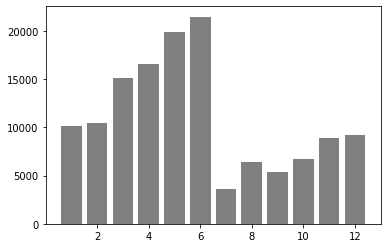

In [161]:
plt.bar(df.index, df.num_loans, color='grey')
plt.title("Number of loans per month", fontsize=20)

TypeError: 'str' object is not callable

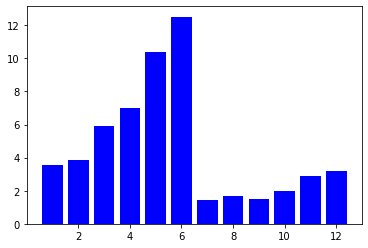

In [162]:
df['profit_by_bank'] =( df.totaldue -df.loanamount)/1000000
plt.bar(df.index, df.profit_by_bank, color='blue')
plt.title("Profit earned from loans per month in millions", fontsize=20)

In [163]:
complete_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,...,latitude_gps,bank_name_clients,employment_status_clients,age,loanapproval,avloanamount,num_loans,avdiff,avtermdays,avtotaldue
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762.0,12.0,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30.0,1.0,Other,...,6.433055,Diamond Bank,Permanent,36.0,1.002222,18181.818182,11,-0.909091,30.0,22081.818182
1,8a8588f35438fe12015444567666018e,301966580.0,7.0,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15.0,1.0,Other,...,10.292041,EcoBank,Permanent,49.0,1.003611,10000.000000,6,0.833333,17.5,11750.000000
2,8a85890754145ace015429211b513e16,301999343.0,3.0,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15.0,1.0,Savings,...,7.491708,First Bank,Permanent,35.0,1.001944,10000.000000,2,7.500000,22.5,12250.000000
3,8a858970548359cc0154883481981866,301962360.0,9.0,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30.0,1.0,Other,...,9.076574,GT Bank,Permanent,44.0,1.001944,18750.000000,8,-3.125000,37.5,23550.000000
5,8a858e095c59b91b015c5e5cea3719bc,301972027.0,3.0,2017-07-10 19:25:33,2017-07-10 18:25:28,10000.0,13000.0,30.0,1.0,Savings,...,6.557011,GT Bank,Permanent,43.0,1.001944,10000.000000,2,-2.500000,22.5,12250.000000


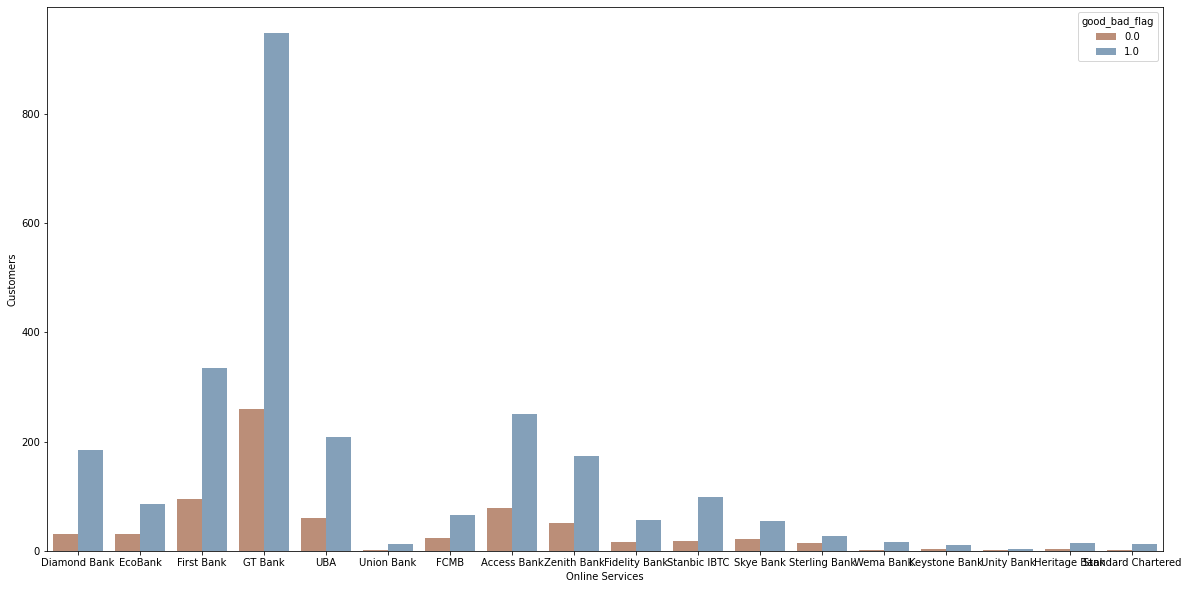

In [164]:
plt.figure(figsize=(20,10))
sns.countplot(complete_df['bank_name_clients'],hue='good_bad_flag', data=complete_df, palette="twilight_shifted_r")
plt.title='Churn per Services Offered'
plt.xlabel('Online Services', fontsize=10)
plt.ylabel('Customers', fontsize=10)
plt.show()

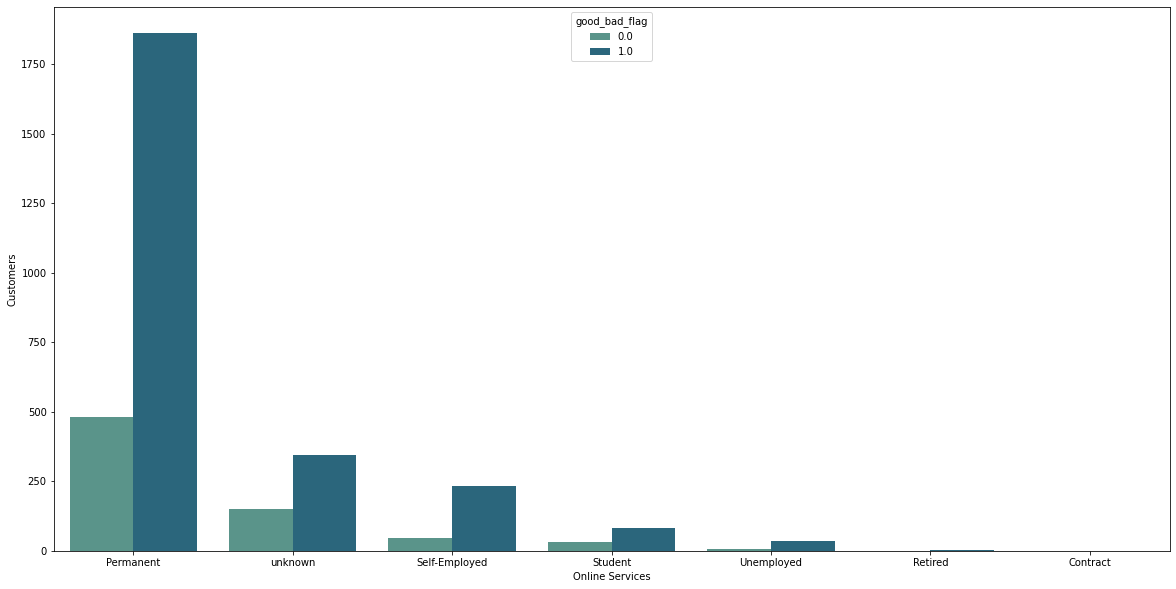

In [165]:
plt.figure(figsize=(20,10))
sns.countplot(complete_df['employment_status_clients'],hue='good_bad_flag', data=complete_df, palette="crest")
plt.title='Churn per Services Offered'
plt.xlabel('Online Services', fontsize=10)
plt.ylabel('Customers', fontsize=10)
plt.show()

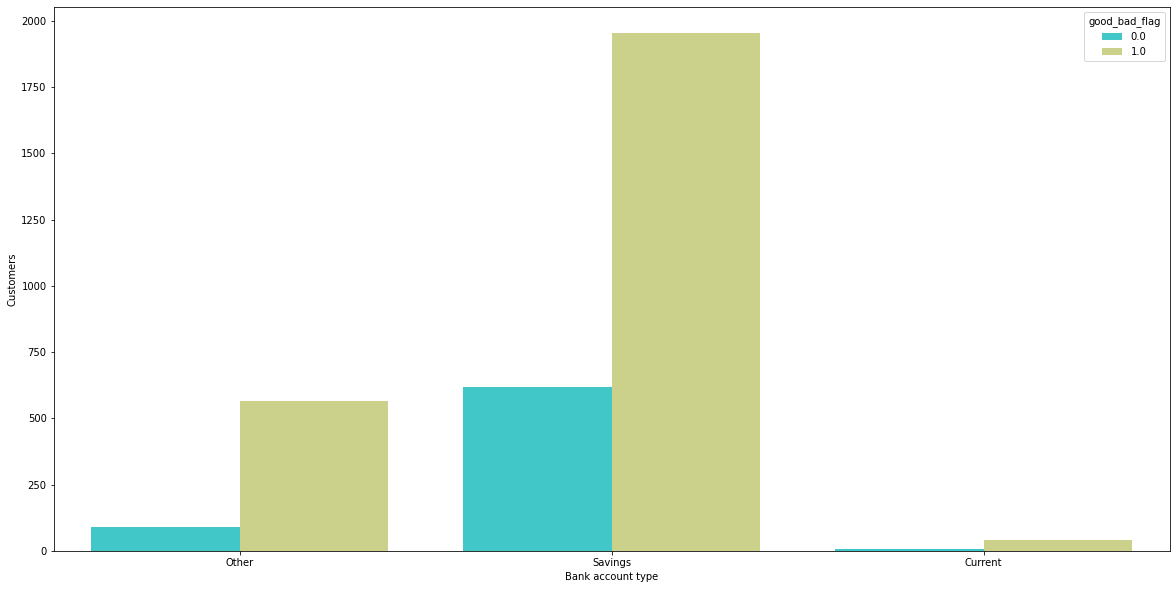

In [166]:
plt.figure(figsize=(20,10))
sns.countplot(complete_df['bank_account_type'],hue='good_bad_flag', data=complete_df, palette="rainbow")
plt.title='Churn per Services Offered'
plt.xlabel('Bank account type', fontsize=10)
plt.ylabel('Customers', fontsize=10)
plt.show()

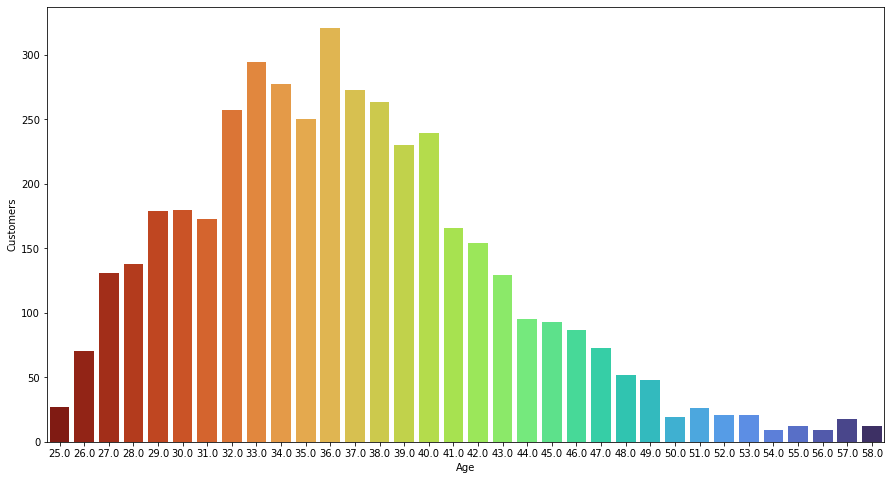

In [167]:
plt.figure(figsize=(15,8))
sns.countplot(demographics['age'], data=complete_df, palette="turbo_r")
plt.title='Churn per Services Offered'
plt.xlabel('Age')
plt.ylabel('Customers')
plt.show()

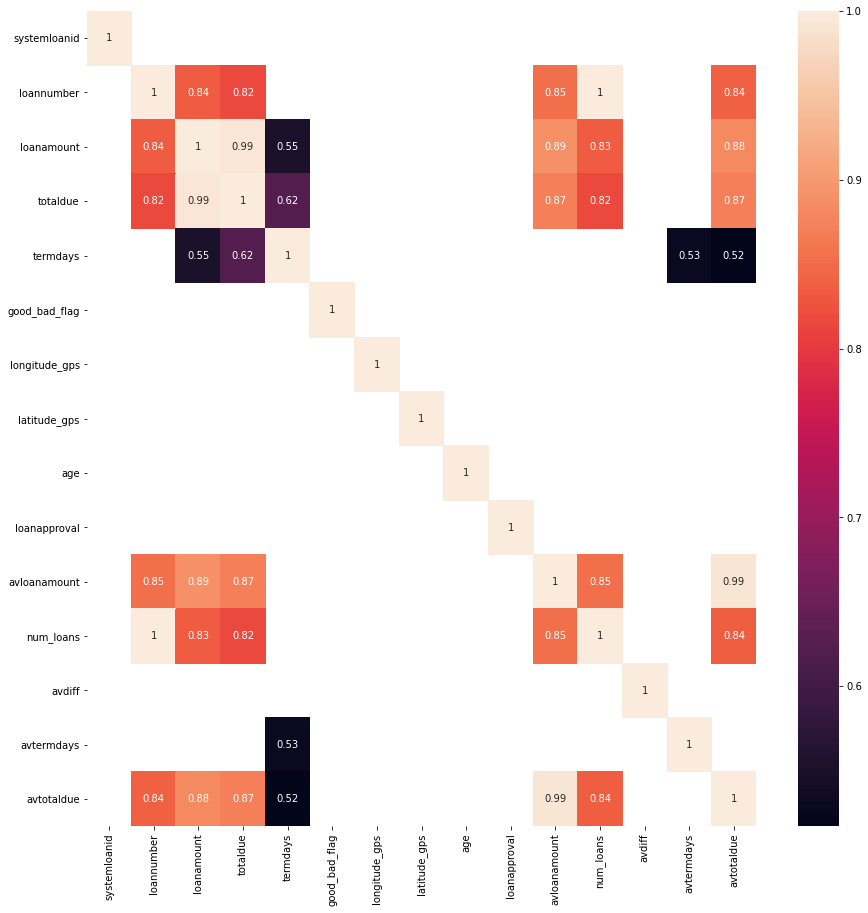

In [168]:
correlation_mat = complete_df.corr()
greater_than= correlation_mat[correlation_mat > 0.5]
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(greater_than,annot=True )
plt.show()


The amount of loans borrowed has a high correlation with the loan amount. This means people who borrow higher amounts of money tend to take more loans than the people who borrowed less amounts.  

In [169]:
#Modelling

<AxesSubplot:xlabel='avtotaldue'>

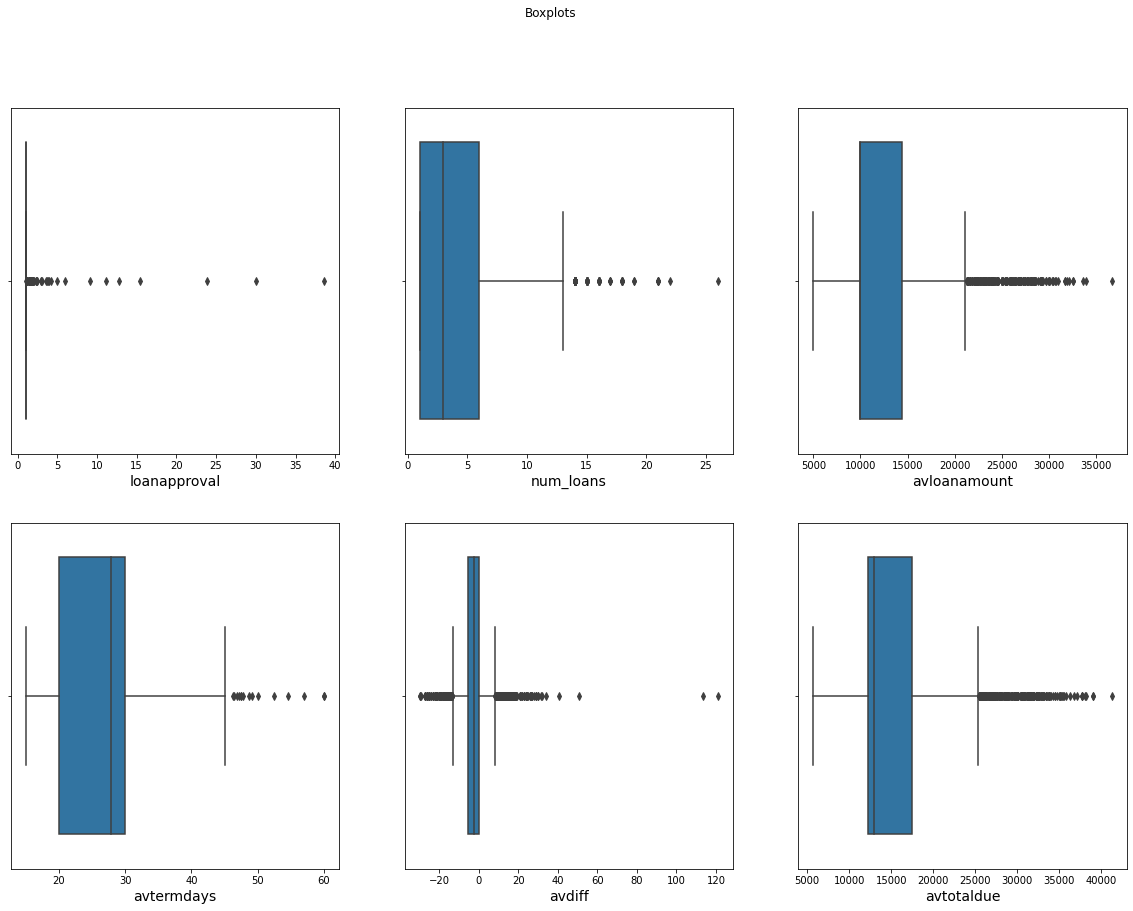

In [170]:
#visualize outliers

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(20, 14))
fig.suptitle('Boxplots')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)
ax5.set_xlabel('xlabel',fontsize=14)
ax6.set_xlabel('xlabel',fontsize=14)
sns.boxplot(complete_df['loanapproval'], ax=ax1)
sns.boxplot(complete_df['num_loans'], ax=ax2)
sns.boxplot(complete_df['avloanamount'], ax=ax3)
sns.boxplot(complete_df['avtermdays'], ax=ax4)
sns.boxplot(complete_df['avdiff'], ax=ax5)
sns.boxplot(complete_df['avtotaldue'], ax=ax6)

<AxesSubplot:xlabel='num_loans', ylabel='avloanamount'>

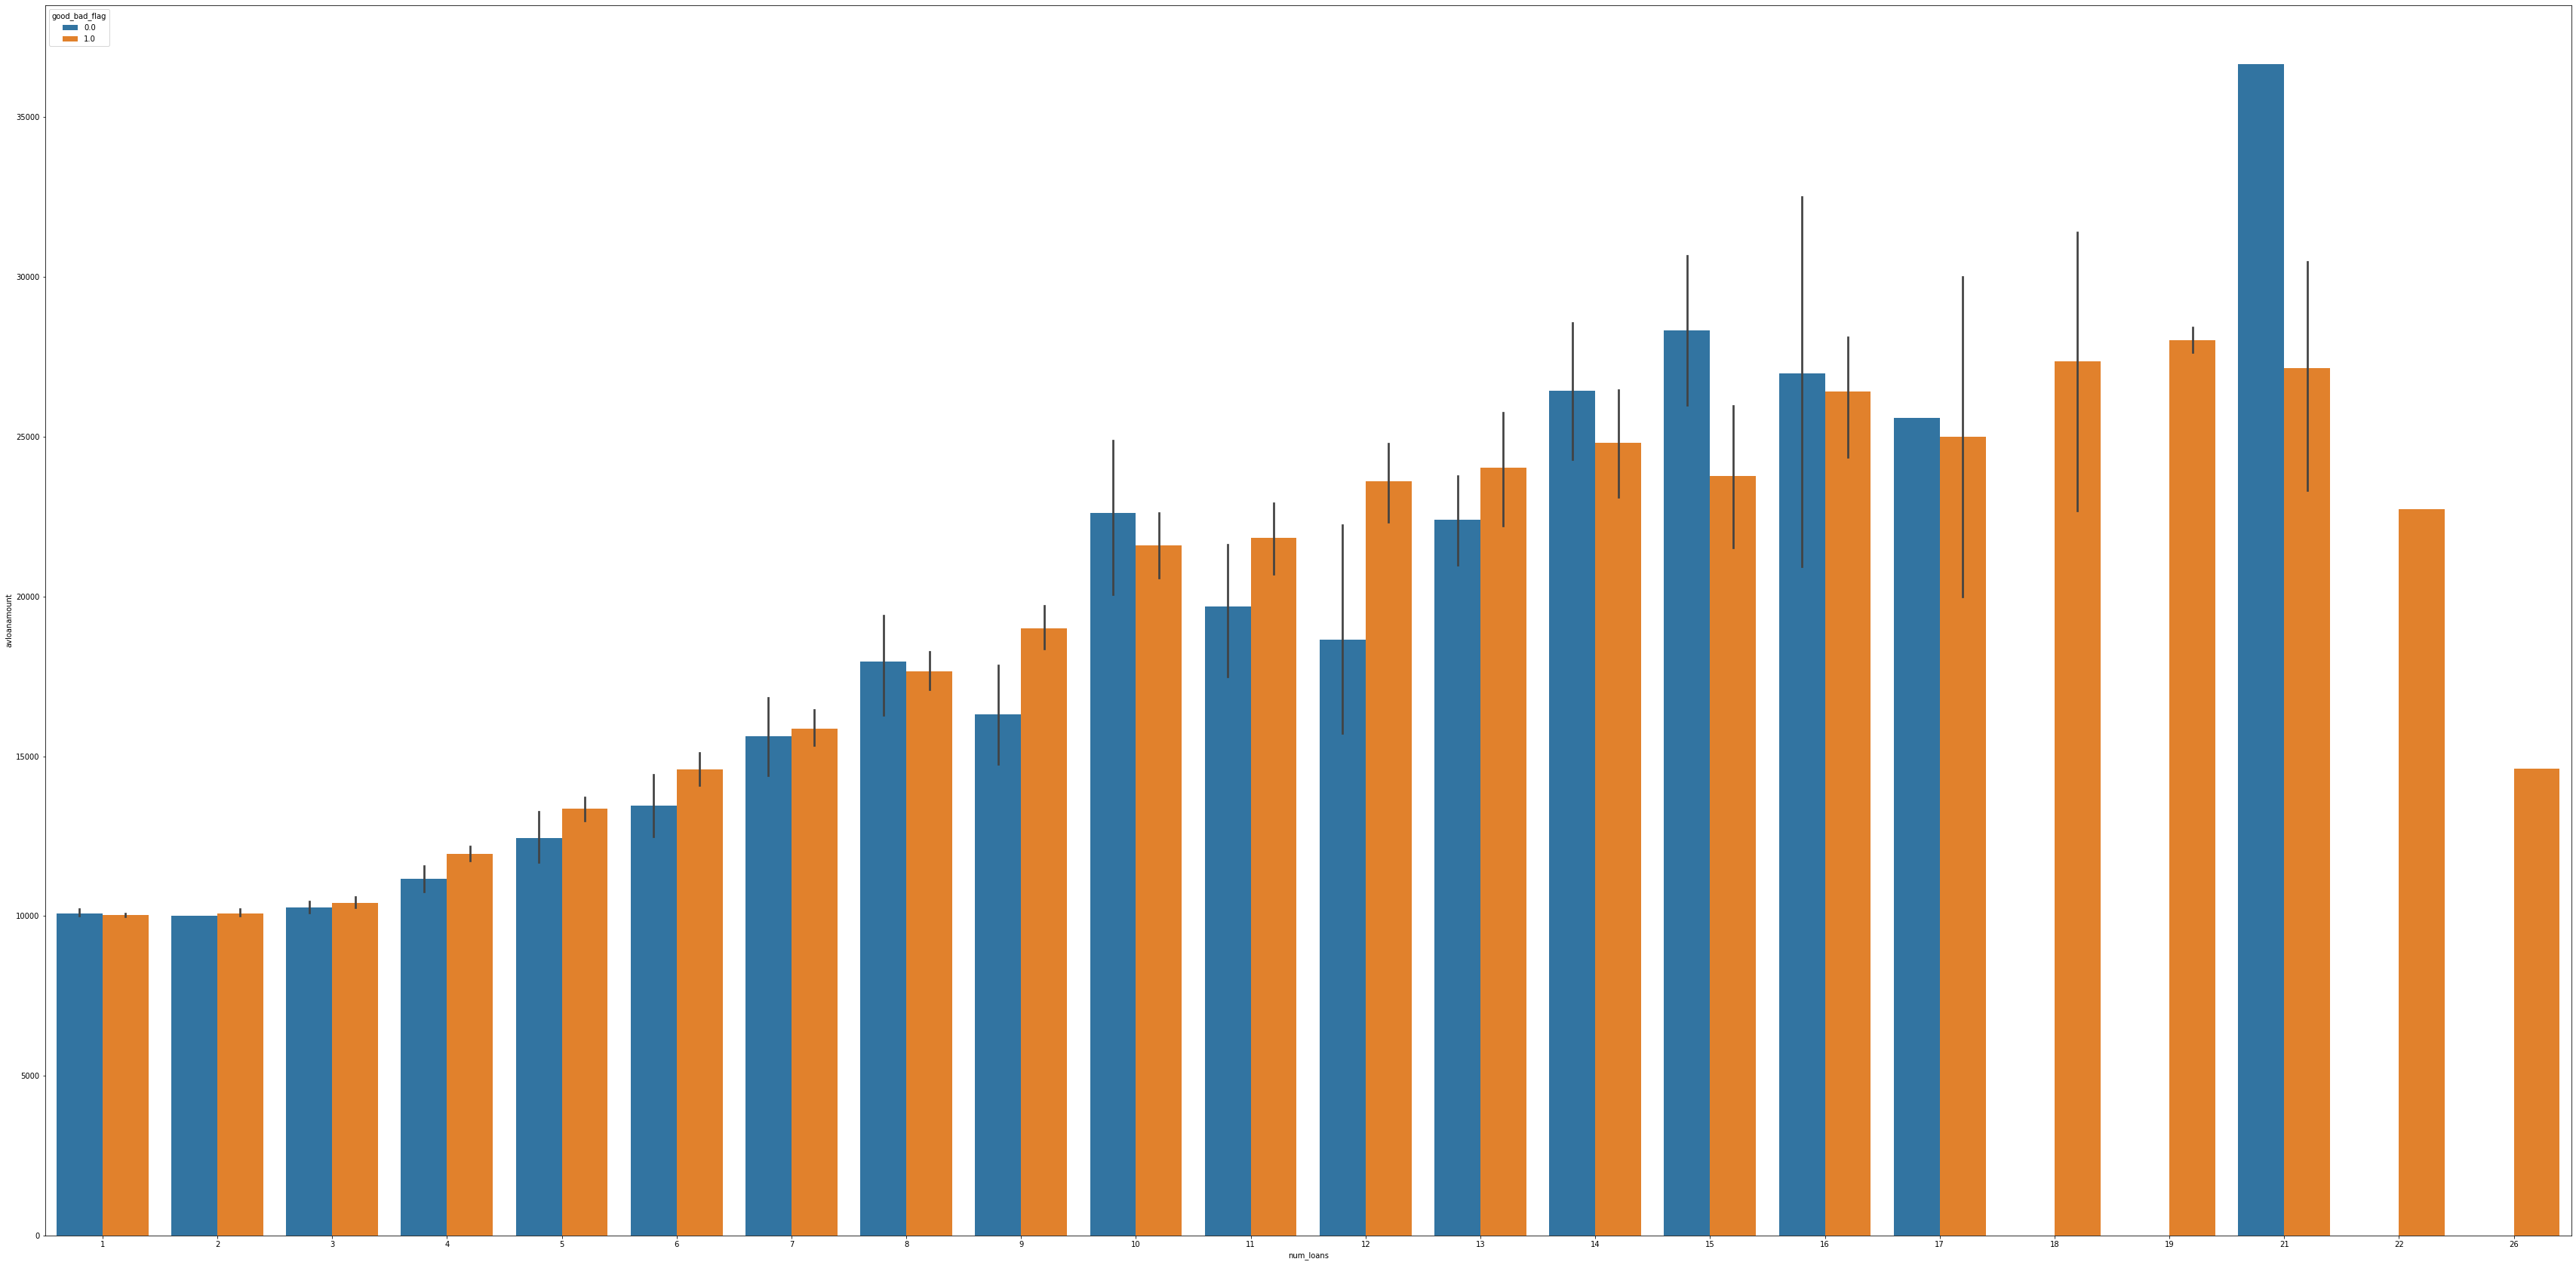

In [171]:
plt.figure(figsize=(60,30))
sns.barplot(x= 'num_loans', y ='avloanamount',data= complete_df, hue='good_bad_flag')

People who borrow an average of 21 loans and above 35,000 tend to be the most defaulters.

In [172]:
#hypothesis testing
hypothesis_df = complete_df

In [173]:
agebins = [18,30,45,60]
labels=['18-30','31-45','46-60']
hypothesis_df['agecategory'] = pd.cut(hypothesis_df['age'], bins=agebins, labels=labels, include_lowest=True)
hypothesis_df['agecategory'].unique()


['31-45', '46-60', '18-30']
Categories (3, object): ['18-30' < '31-45' < '46-60']

In [174]:
random.seed(10)
sample_df = hypothesis_df.sample(354)

Test 1: Does the age of a customer influence their default behaviour on loans?

H0 : Age of customer has no association with their loan default behaviour

H1 : Age of a customer has an association with their loan default behaviour

In [175]:
table_age = pd.crosstab(sample_df['good_bad_flag'], sample_df['agecategory'])
table_age

agecategory,18-30,31-45,46-60
good_bad_flag,,,
0.0,13,48,11
1.0,51,208,23


In [176]:
# Perform a chi-square test with alpha 0.05
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(table_age.to_numpy())

#Calculate critical value, set significance level to 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Critical value: {critical_value}, test_statistic: {stat}, alpha: {1-prob}, p_value: {p}')

Critical value: 5.991464547107979, test_statistic: 3.4278020051105558, alpha: 0.050000000000000044, p_value: 0.18016160910181794


p value is greater than alpha thus lack of significant evidence, we fail to reject the null hypothesis with 95% confidence.

Test 2: Does the number of loans that a customer has taken influence their loan default behaviour?

H0 = Average number of loans is equal for both good and bad loans

H1 = Average number of loans != for good and bad loans

In [177]:
# Perform a ztest with 95% confidence level
from statsmodels.stats.weightstats import ztest

stat, p = ztest(sample_df[sample_df['good_bad_flag'] == 1]['num_loans'], sample_df[sample_df['good_bad_flag'] == 0]['num_loans'])

print(f'Z statistic: {stat}, p_value: {p}, alpha: 0.05')

Z statistic: 1.8771564701559331, p_value: 0.060496651627517654, alpha: 0.05


p value is less than alpha thus significant evidence to reject the null hypothesis with 95% confidence.

Test 3: Does the average time taken for a customer to pay back a loan influence their loan default behaviour?

H0: Average number of days to pay back a loan is equal for both good and bad loans.

H1: Average number of days to pay back a loan is not equal for both good and bad loans.

In [178]:
# Perform a ztest with 95% confidence level
from statsmodels.stats.weightstats import ztest

stat, p = ztest(sample_df[sample_df['good_bad_flag'] == 1]['avdiff'], sample_df[sample_df['good_bad_flag'] == 0]['avdiff'])

print(f'Z statistic: {stat}, p_value: {p}, alpha: 0.05')

Z statistic: -3.0217074531661687, p_value: 0.0025135333985356017, alpha: 0.05


p value is greater than alpha thus lack of significant evidence, we fail to reject the null hypothesis with 95% confidence.

Test 4: Does the average time taken for a customer's loan to get approved influence their loan default behaviour?

H0: Average time to get a loan approved is equal for both good and bad loans.

H1: Average time to get a loan approved is not equal for both good and bad loans.

In [179]:
# Perform a ztest with 95% confidence level
from statsmodels.stats.weightstats import ztest

stat, p = ztest(sample_df[sample_df['good_bad_flag'] == 1]['loanapproval'], sample_df[sample_df['good_bad_flag'] == 0]['loanapproval'])

print(f'Z statistic: {stat}, p_value: {p}, alpha: 0.05')

Z statistic: 0.07192223988803821, p_value: 0.9426637910099347, alpha: 0.05


p value is greater than alpha thus lack of significant evidence, we fail to reject the null hypothesis with 95% confidence

Test 5: Does the bank that a customer gets a loan from influence their loan default behaviour?

H0: There is no association between the bank name and the good_bad_flag variables

H1: There is an association between the bank name and the good_bad_flag variables

In [180]:
# Perform a chi-square test with alpha 0.05

prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Critical value: {critical_value}, test_statistic: {stat}, alpha: {1-prob}, p_value: {p}')

Critical value: 5.991464547107979, test_statistic: 0.07192223988803821, alpha: 0.050000000000000044, p_value: 0.9426637910099347


p value is greater than alpha thus lack of significant evidence, we fail to reject the null hypothesis with 95% confidence

Test 6: Does the bank account type that a customer has influence their loan default behaviour?

H0: There is no association between the bank account type and the good_bad_flag variables

H1: There is an association between the bank account type and the good_bad_flag variables

In [181]:
table_account = pd.crosstab(sample_df['good_bad_flag'], sample_df['bank_account_type'])
table_account

bank_account_type,Current,Other,Savings
good_bad_flag,,,
0.0,2,9,61
1.0,4,64,214


In [182]:
stat, p, dof, expected = chi2_contingency(table_account.to_numpy())

#Calculate critical value, set significance level to 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Critical value: {critical_value}, test_statistic: {stat}, alpha: {1-prob}, p_value: {p}')

Critical value: 5.991464547107979, test_statistic: 4.092625291092211, alpha: 0.050000000000000044, p_value: 0.1292104710620015


p value is greater than the alpha thus lack of significant evidence, we fail to reject the null hypothesis with 95% confidence.

Test 7: Does the employment status of a customer influence their loan default behaviour?

H0: There is no association between the employment status and the good_bad_flag variables

H1: There is an association between the employment status and the good_bad_flag variables

In [183]:
table_employment = pd.crosstab(sample_df['good_bad_flag'], sample_df['employment_status_clients'])
table_employment

employment_status_clients,Permanent,Self-Employed,Student,Unemployed,unknown
good_bad_flag,,,,,
0.0,50,3,3,0,16
1.0,202,26,9,2,43


In [184]:
stat, p, dof, expected = chi2_contingency(table_employment.to_numpy())

#Calculate critical value, set significance level to 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Critical value: {critical_value}, test_statistic: {stat}, alpha: {1-prob}, p_value: {p}')

Critical value: 9.487729036781154, test_statistic: 4.171614368010185, alpha: 0.050000000000000044, p_value: 0.38327830341919883


p-value is greater than alpha thus lack of significant evidence, we fail to reject the null hypothesis with 95% confidence.

In [185]:
#modelling
complete_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,...,bank_name_clients,employment_status_clients,age,loanapproval,avloanamount,num_loans,avdiff,avtermdays,avtotaldue,agecategory
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762.0,12.0,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30.0,1.0,Other,...,Diamond Bank,Permanent,36.0,1.002222,18181.818182,11,-0.909091,30.0,22081.818182,31-45
1,8a8588f35438fe12015444567666018e,301966580.0,7.0,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15.0,1.0,Other,...,EcoBank,Permanent,49.0,1.003611,10000.000000,6,0.833333,17.5,11750.000000,46-60
2,8a85890754145ace015429211b513e16,301999343.0,3.0,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15.0,1.0,Savings,...,First Bank,Permanent,35.0,1.001944,10000.000000,2,7.500000,22.5,12250.000000,31-45
3,8a858970548359cc0154883481981866,301962360.0,9.0,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30.0,1.0,Other,...,GT Bank,Permanent,44.0,1.001944,18750.000000,8,-3.125000,37.5,23550.000000,31-45
5,8a858e095c59b91b015c5e5cea3719bc,301972027.0,3.0,2017-07-10 19:25:33,2017-07-10 18:25:28,10000.0,13000.0,30.0,1.0,Savings,...,GT Bank,Permanent,43.0,1.001944,10000.000000,2,-2.500000,22.5,12250.000000,31-45


In [186]:
complete_df.shape

(3272, 22)

In [187]:
from sklearn.model_selection import train_test_split as tts
final_df= complete_df

X = final_df.loc[:, final_df.columns != 'good_bad_flag']
Y = final_df['good_bad_flag'].astype(np.int64)

num_var = final_df.select_dtypes(include=['float64']).columns
num_data = final_df[num_var]

obj_var = final_df.select_dtypes(include=['object']).columns
obj_data = final_df[obj_var]

In [188]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num_data)
num_data = scaler.transform(num_data)

In [189]:
# Encode categorical features
obj_data = pd.get_dummies(obj_data)

#Concatenate scaled and encoded features
X = np.concatenate((num_data, obj_data.to_numpy(dtype=np.float64)), axis=1)

x_train, x_test, y_train, y_test= tts(X, Y, test_size = 0.3, random_state=1)

In [190]:
print(x_train.shape, x_test.shape)

(2290, 3306) (982, 3306)


In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [192]:
classifiers = {
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),    
}

In [193]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    train_score = round(classifier.score(x_train, y_train),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_test, y_test),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]


In [194]:
from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    train_score = cross_val_score(classifier, x_train, y_train, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, x_test, y_test, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.99, 1.0, 1.0, 1.0]
[1.0, 0.99, 1.0, 0.97]


In [195]:
# Perform stratified sampling in the train test split

x1_train, x1_test, y1_train, y1_test = tts(X, Y, test_size = 0.3, random_state=1, stratify=Y)

In [196]:
# Load and fit better performing models

support_vector = SVC(probability=True).fit(x1_train, y1_train)
random_forest = RandomForestClassifier().fit(x1_train,y1_train)

y_pred_svc = support_vector.predict(x1_test)
y_pred_forest = random_forest.predict(x1_test)


In [197]:
# Evaluate models
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

print(" Support Vector Machine accuracy:",metrics.accuracy_score(y1_test, y_pred_svc))
print(" Random Forest accuracy:",metrics.accuracy_score(y1_test, y_pred_forest))

 Support Vector Machine accuracy: 0.9928716904276986
 Random Forest accuracy: 0.9989816700610998


In [198]:
#get roc_auc_score for all

y_prob_svc = support_vector.predict_proba(x1_test)
y_prob_forest = random_forest.predict_proba(x1_test)


In [199]:
#how svc predicts
good_probs_svc = y_prob_svc[:, 1]
bad_probs_svc = y_prob_svc[:, 0]
# Prediction probabilties
print('Support Vector Classifier: ')
print("Good Loans: ", roc_auc_score(y1_test, good_probs_svc))
print("Bad Loans: ", roc_auc_score(y1_test, bad_probs_svc))

Support Vector Classifier: 
Good Loans:  0.9998600564641744
Bad Loans:  0.00013994353582554497


In [200]:
#how random forest predicts
good_probs_forest = y_prob_forest[:, 1]
bad_probs_forest = y_prob_forest[:, 0]
# Prediction probabilties
print('Random Forest Classifier: ')
print("Good Loans: ", roc_auc_score(y1_test, good_probs_forest))
print("Bad Loans: ", roc_auc_score(y1_test, bad_probs_forest))

Random Forest Classifier: 
Good Loans:  1.0
Bad Loans:  0.0


In [201]:
#upsampling

In [202]:
from sklearn.utils import resample

df_good = final_df[final_df['good_bad_flag'] == 1]
df_bad = final_df[final_df['good_bad_flag'] == 0]

In [203]:
# Check number of good loans
df_good.good_bad_flag.value_counts()

1.0    2560
Name: good_bad_flag, dtype: int64

In [204]:
# Upsample minority class
df_bad_upsampled = resample(df_bad, 
                                 replace=True,     # sample with replacement
                                 n_samples=3416,    # to match majority class
                                 random_state=24) # reproducible results

In [205]:
# Combine majority class with upsampled minority class
train_data_upsampled = pd.concat([df_good, df_bad_upsampled])
 
# Display new class counts
train_data_upsampled.good_bad_flag.value_counts()

0.0    3416
1.0    2560
Name: good_bad_flag, dtype: int64

In [206]:
X1 = train_data_upsampled.loc[:, train_data_upsampled.columns != 'good_bad_flag']
Y1 = train_data_upsampled['good_bad_flag'].astype(np.int64)

num_var1 = X1.select_dtypes(include=['float64']).columns
num_data1 = X1[num_var1]

column_names = num_data1.columns.to_list()
obj_var1 = X1.select_dtypes(include=['object']).columns
obj_data1 = X1[obj_var1]

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num_data1)
num_data1 = scaler.transform(num_data1)

# Encode categorical features
obj_data1 = pd.get_dummies(obj_data1)
column_names.extend(obj_data1.columns.to_list())

#Concatenate scaled and encoded features
X1 = np.concatenate((num_data1, obj_data1.to_numpy(dtype=np.float64)), axis=1)

x2_train, x2_test, y2_train, y2_test = tts(X1, Y1, test_size = 0.2, random_state=1)

In [207]:
support_vector = SVC(probability=True).fit(x2_train, y2_train)
random_forest = RandomForestClassifier().fit(x2_train,y2_train)

y_pred_svc = support_vector.predict(x2_test)
y_pred_forest = random_forest.predict(x2_test)

In [100]:
# Evaluate models

print(" Support Vector Machine accuracy:",metrics.accuracy_score(y2_test, y_pred_svc))
print(" Random Forest accuracy:",metrics.accuracy_score(y2_test, y_pred_forest))

 Support Vector Machine accuracy: 0.7625418060200669
 Random Forest accuracy: 0.9506688963210702


In [101]:
# Evaluate roc_auc_score
y_prob_forest = random_forest.predict_proba(x2_test)[:, 1]
print("Roc_auc_score : ", roc_auc_score(y2_test, y_prob_forest))

Roc_auc_score :  0.9920699384404925


In [102]:
# Create confusion
from sklearn.metrics import confusion_matrix
matrix = pd.DataFrame(confusion_matrix(y2_test, y_pred_forest), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

In [103]:
matrix

,Predicted Negative,Predicted Positive
Actual Negative,669,11
Actual Positive,48,468


In [104]:
importance = list(random_forest.feature_importances_)
test_features = complete_df.columns.to_list()
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importance)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variable: {:21} Importance: {}'. format(*pair)) for pair in feature_importances];


Variable: longitude_gps         Importance: 0.09
Variable: customerid            Importance: 0.06
Variable: loanamount            Importance: 0.06
Variable: totaldue              Importance: 0.06
Variable: termdays              Importance: 0.05
Variable: good_bad_flag         Importance: 0.05
Variable: bank_name_clients     Importance: 0.04
Variable: systemloanid          Importance: 0.03
Variable: approveddate          Importance: 0.03
Variable: latitude_gps          Importance: 0.03
Variable: loannumber            Importance: 0.02
Variable: bank_account_type     Importance: 0.02
Variable: creationdate          Importance: 0.01
Variable: employment_status_clients Importance: 0.0
Variable: age                   Importance: 0.0
Variable: loanapproval          Importance: 0.0
Variable: avloanamount          Importance: 0.0
Variable: num_loans             Importance: 0.0
Variable: avdiff                Importance: 0.0
Variable: avtermdays            Importance: 0.0
Variable: avtotaldue   